In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

Se importa el dataset

In [ ]:
dataset_df = pd.read_excel('/content/drive/MyDrive/AA2/SeriesReport-20221205204545_e08a2c.xlsx', skiprows=9)
dataset_df.drop(columns=dataset_df.columns[0], axis=1, inplace=True)
dataset_df.head(5)

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Period,Value
0,1976.0,M01,0.605
1,1976.0,M02,0.600
2,1976.0,M03,0.594
3,1976.0,M04,0.592
4,1976.0,M05,0.600


Cambiar Period a valor numerico

In [ ]:
cleanup_nums = {"Period": {"M01": 1, "M02": 2, "M03": 3, "M04": 4, "M05": 5, "M06": 6,"M07": 7, "M08": 8, "M09": 9, "M10": 10, "M11": 1, "M12": 12}}


In [ ]:
dataset_df = dataset_df.replace(cleanup_nums)
dataset_df.head(5)

,Year,Period,Value
0,1976.0,1,0.605
1,1976.0,2,0.600
2,1976.0,3,0.594
3,1976.0,4,0.592
4,1976.0,5,0.600


In [ ]:
X = dataset_df.iloc[:,:-1]  
y = dataset_df.iloc[: , -1]

Separar datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test,y_test)

0.9301200585092392

In [ ]:
y_pred = clf.predict(X)

Graficar prediccion vs realidad

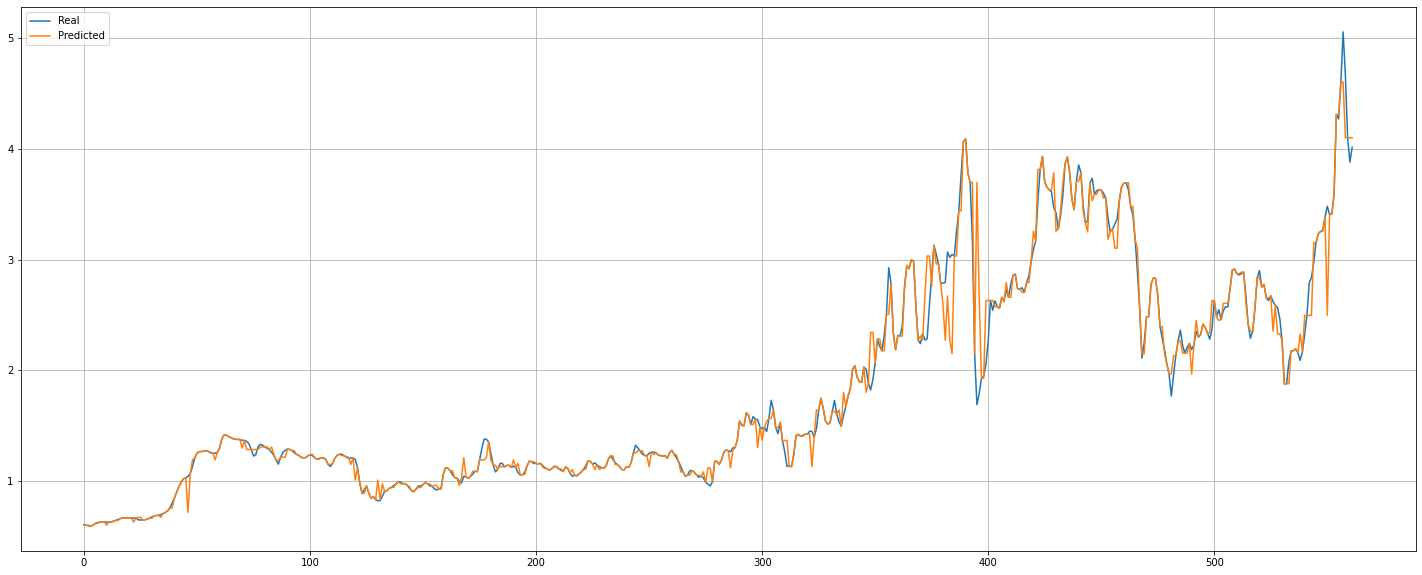

In [ ]:
values = pd.DataFrame(data=y)
values['Predicted'] = y_pred
values.columns =  ['Real', 'Predicted']
values.plot(figsize=(25,10)).grid()

Todo predict future values